### Statistical programming with Python 3

To date, we have used [Python 3]() to help us analyze potentially hazardous chemicals in haircare products, voluntary adverse events due to cardiovascular devices reported to the FDA, confirmed cases of COVID-19 including reported cases at Lehigh University and regional differences in case counts, how to find the most probable disease given symptoms, and a classical model of infectious disease dynamics. 
Python is a versatile tool that can analyze many different types of data.

The goal for these notes is to (i) re-emphasize Python building blocks and (ii) more formally introduce [Pandas](https://pandas.pydata.org/) or Python Data Analysis library. 
Python fundamentals and Pandas will be used to explore the [Ultimate Halloween Candy Power Ranking](https://fivethirtyeight.com/videos/the-ultimate-halloween-candy-power-ranking/).

The [Ultimate Halloween Candy Power Ranking](https://fivethirtyeight.com/videos/the-ultimate-halloween-candy-power-ranking/) was a study to rank halloween candy by popularity. 
To estimate candy rankings, a [website](http://walthickey.com/2017/10/18/whats-the-best-halloween-candy/) was designed that picked two candies at random and asked users to pick the treat they would prefer as a trick-or-treater. 

The candy rankings dataset is on [GitHub](https://github.com/) and can be accessed using a function from the pandas library called [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). 
The **read_csv** function takes as input the path of a csv file on your local computer or a url of a csv file on the internet.
The URL for candy data is [https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv](https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv)

In [86]:
candyData = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv")

We can look at the first $N$ rows of our dataset by using the function [head(N)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html). 

In [87]:
candyData.head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963
9,Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,34.517681


## Analysis plan

We will run the following analysis:

* Examine simple characteristics of the data
    * Count the number of observations
    * Count the number of unique candies
    * Count the number of candies that are categorized as chocolate, fruity, caramel, etc.
    
* Define a random variable that describes sugar percentage 
    * Discuss whether this variable should be discrete or continuous
    * Discuss the potential values this r.v. can take
    * Build a histogram from the data to estimate this r.v.'s probability distribution

* Generate, test, and interpret a hypothesis
    * Use EDA to generate a hypothesis about our data
    * Informally describe our hypothesis
    * Formally define our hypothesis
    * State the test we will use to support or refute our hypothesis
    * Interpret the results of our statistical test
    
* Discuss the results of our test

### Examine simple characteristics of the data

#### Count the number of observations

The [len](https://docs.python.org/3/library/functions.html#len) function counts the number of items in a [list](https://docs.python.org/3/tutorial/datastructures.html), the number of items in a [tuple](https://docs.python.org/3/tutorial/datastructures.html?highlight=tuple#tuples-and-sequences), and the number of keys in a [dictionary](https://docs.python.org/3/tutorial/datastructures.html?highlight=tuple#dictionaries).  

When used on a Pandas dataframe, len counts the number of rows (observations). 

In [88]:
numberOfObservations = len(candyData)
print(numberOfObservations)

85


The [shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html) function is built-in to every Pandas dataframe and returns a tuple of (the number of rows, the number of columns).

In [89]:
numRowsAndNumCols = candyData.shape
print("Shape = ") # print out the tuple
print(numRowsAndNumCols)

numberOfObservations = numRowsAndNumCols[0]                                       # access the first item in the tuple
print("First item of shape is number of rows: {:d}".format(numberOfObservations)) # print out the tuple

Shape = 
(85, 13)
First item of shape is number of rows: 85


#### Count the number of candies that are categorized as chocolate, fruity, caramel, etc.

To count the number of candies that fall into each attribute included in our data, we will need to do the following:
1. Extract the names of the columns in our dataset referring to candy attributes
2. Loop through each candy attribute
3. Extract the variable that identifies if each of our 85 candies has or does not have this attribute
4. Sum the number of candies that have the attribute
5. Store the attributes and counts in two lists
6. Plot the frequency of candy attributes using a barplot

##### Column names

Pandas dataframes come pre-built with a method (a function associated with a specific Python object) to return the named of each column---[columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html). 

To use the columns method, add ".columns" to the end of your dataframe. 

In [90]:
columnNames = candyData.columns
print(columnNames)

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')


##### Loop through candy attributes

We need to subset our list of column names to candy attributes and built a for loop that runs through all the candy attributes.
The ".columns" method returns a list of columns name and we can subset this list to candy attributes by using [slices](https://docs.python.org/3/glossary.html#term-slice).

In [91]:
candyAttributes = columnNames[1:9+1]
print(candyAttributes)

Index(['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat',
       'crispedricewafer', 'hard', 'bar', 'pluribus'],
      dtype='object')


We can build a [for loop](https://docs.python.org/3/tutorial/controlflow.html?highlight=loop#for-statements) that iterates over our list like this

In [92]:
for attribute in candyAttributes:
        print(attribute)

chocolate
fruity
caramel
peanutyalmondy
nougat
crispedricewafer
hard
bar
pluribus


The structure of a **for loop** is the keyword "for" followed by the object to assign each item in the loop in order, the keyword "in" followed by the object to loop over and finally a colon. 
Code indented underneath this sentence will be run for every item in the above list. 

#### Extract the variable that identifies if each of our 85 candies has or does not have this attribute

We can extract the column of our dataset that refers to a specific candy attribute, a column name in several ways.
The first way uses a Pandas dataframe built-in function ".<column name>" where the <column name> is a string identifying which column to choose. Let's pick the caramel attribute from our dataset.

In [93]:
caramal = candyData.caramel
print(caramal[:10]) # print the first 10/85 items

0    1
1    0
2    0
3    0
4    0
5    0
6    1
7    0
8    0
9    1
Name: caramel, dtype: int64


Another method is extract the "carmel" attribute is to use square brackets

In [94]:
caramal = candyData[["caramel"]]
print(caramal[:10])

   caramel
0        1
1        0
2        0
3        0
4        0
5        0
6        1
7        0
8        0
9        1


A third way to extract the caramel variable is to use the Pandas built-in [loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) function. 
The loc function takes as input two lists separated by a comma referring to the rows and columns you want to select from a dataframe. 
You can select rows by building a list of True (the rows you want) and False (the rows you don't) values or by defining a logical statement to test each row and evaluate to True/False.
Use a ":" if you want all rows.

You can select columns by providing a list of column names. 
Use a ":" if you want all columns.

In [95]:
caramal = candyData.loc[:,"caramel"]
print(caramal[:10])

0    1
1    0
2    0
3    0
4    0
5    0
6    1
7    0
8    0
9    1
Name: caramel, dtype: int64


Let now loop through each candy attribute, count the number of candies that have that attribute, and store the attributes and corresponding frequencies in a list.

In [96]:
fromAttr2Count = {"attr":[],"count":[]}
for attribute in candyAttributes:                           # loop through a list of strings that contain candy attributes
    singleVariable = candyData.loc[:,attribute]             # extract the "attribute" column from the data
    numberOfCandiesThatHaveThisAttr = sum( singleVariable ) # sum this column of 1s and 0s
    
    # Store computations in a dictionary
    fromAttr2Count["attr"].append(attribute)       
    fromAttr2Count["count"].append(numberOfCandiesThatHaveThisAttr)
attributes = pd.DataFrame(fromAttr2Count)    
attributes

,attr,count
0,chocolate,37
1,fruity,38
2,caramel,14
3,peanutyalmondy,14
4,nougat,7
5,crispedricewafer,7
6,hard,15
7,bar,21
8,pluribus,44


The [pd.DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) will convert a dictionary into a dataframe, so long as each key refers to a single column.
Lets plot our attributes and counts using a barplot.

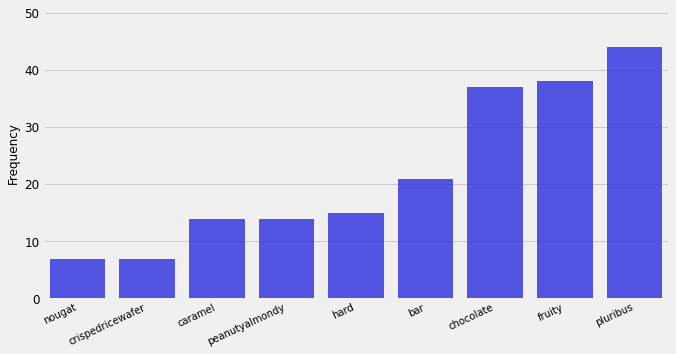

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

attributes = attributes.sort_values("count") # sort candy attributes by frequency

plt.style.use("fivethirtyeight") # use a style---a set of plot characteristics
fig,ax = plt.subplots()          # Initialize a figure and axis for our plot

# draw a barplot using seaborn
sns.barplot(x="attr",y="count" # define the x and y values 
            ,color="blue"      # set the color of the bars
            ,alpha=0.75        # set the transparancy of the bars
            ,data=attributes)  # define what dataset contains the x and y values defined above

ax.set_ylim(0,51)                      # set the limits of the vertical axis
 
ax.set_xlabel("")                      # remove the horizontal label (set as an empty string)
ax.set_ylabel("Frequency",fontsize=12) # specify a label for the vertical axis

ax.tick_params(labelsize=12)           # allow all ticks to be fontsize 12
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10, rotation=25,ha="right") # rotate the xticks 

fig.set_size_inches(10,5)              # set the size of the figure in inches (width, height)
plt.show()                             # show us all our hardwork!

### Define a random variable that describes sugar percentage 

Let us define a random variable $S$ that describes the percentage of sugar you might find by selecting at random one of the $85$ candies.
   
#### Discuss whether this variable should be discrete or continuous and potential values it can take

To decide if the r.v. $S$ characterizing sugar percentages in candy should be a discrete or continuous r.v. and to find out what sugar percentages are possible for this data we can extract the sugar percentage variable and plot a histogram. 

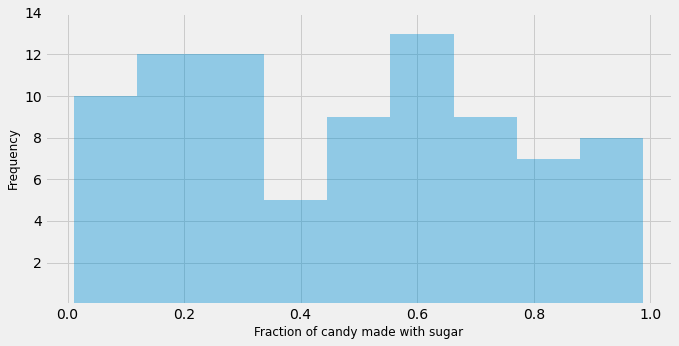

In [98]:
sugarPCT = candyData.sugarpercent      # extract fraction of sugar from candies in dataset

fig,ax = plt.subplots()                # Initialize a figure and axis for our plot 

sns.distplot(sugarPCT,9,kde=False)     # a seaborn "distribution plot" (a histogram)

ax.set_xlabel("Fraction of candy made with sugar",fontsize=12) # set the horizontal label
ax.set_ylabel("Frequency",fontsize=12)                         # set the vertical label

ax.set_yticks(ax.get_yticks()[1:])     # set the ticks for the vertical axis

fig.set_size_inches(10,5)              # set the size of the figure in inches (width, height)
plt.show()                             # show us all our hardwork!

What we've learned from our historgram is that our r.v. $S$ should likely be considered continuous, taking values between 0 and 1 inclusive.

### Generate, test, and interpret a hypothesis

#### Use EDA to generate a hypothesis about our data

We will explore the association between the fraction of candy that is made of sugar (sugar percent) to the percentage of times the candy won when compared to another (win percentage).   
First we will build a scatter plot to look at each individual pair of (Sugar percent, Win percentage) and second divide our dataset by a sugar percent and make a box plot of win percentage. 

(-1.0, 101.0)

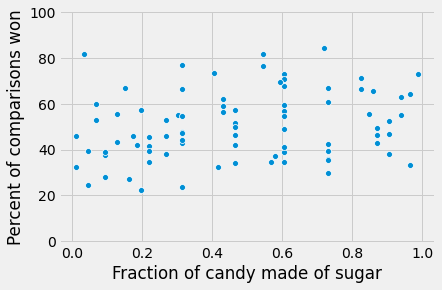

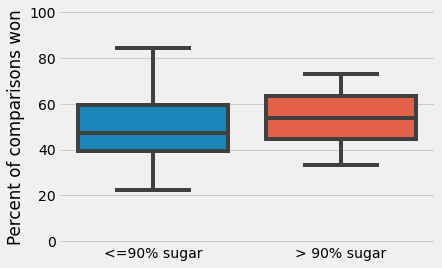

In [113]:
# scatter plot
fig, ax = plt.subplots()                         # Initialize a figure and axis for our plot 

# scatterplot
sns.scatterplot(x="sugarpercent",y="winpercent"
                ,data=candyData
                ,ax = ax)    

ax.set_xlabel("Fraction of candy made of sugar")  # set the horizontal axis
ax.set_ylabel("Percent of comparisons won")       # set the vertical axis

ax.set_ylim(-1,101)                               # set the bottom and top y limits

candyData["morethan90"] = [ 1 if x > 0.90 else 0 for x in candyData.sugarpercent]

fig, ax = plt.subplots()                                                   # Initialize a figure and axis for our plot 
sns.boxplot( x="morethan90", y="winpercent", data = candyData, ax=ax )
ax.set_xticklabels(["<=90% sugar", "> 90% sugar"])

ax.set_xlabel("")
ax.set_ylabel("Percent of comparisons won")

ax.set_ylim(-1,101)

#### Informally describe our hypothesis

I think trick-or-treaters prefer candies very high in sugar. 

#### Formally define our hypothesis

Let us define $\mu$ as the mean win percentage for haloween candies. 
I formally hypothesize

\begin{align}
    H_{0}:&  \mu_{\le 90} = \mu_{> 90} \\
    H_{\text{A}}:& \mu_{\le 90} < \mu_{> 90} \\
\end{align}

or 

\begin{align}
    H_{0}:&  \mu_{\le 90} - \mu_{> 90} = 0 \\
    H_{\text{A}}:& \mu_{\le 90} - \mu_{> 90} < 0 \\
\end{align}



#### State the test we will use to support or refute our hypothesis

To test our hypothesis we will compute our observed t-statistic of the difference in the average win percentage between candy with less than 90% sugar and candy with greater than 90% sugar.
With our t-stat we can calculate the probability of observing t-statistics as or more extreme than our observed statistics assuming the null hypothesis is true---called the [pvalue](https://en.wikipedia.org/wiki/P-value).

This test is commonly called a **one-sided two sample t-test** and the statistic is computed like this

\begin{align}
    t = \dfrac{ ( \mu_{> 90} - \mu_{\le 90} ) - \text{Null diff.}}{ S \Big / \sqrt{N} }
\end{align}

where $S$ is the standard deviation of the difference in win percentages and $N$ is the number of samples in our dataset. 

We will consider a pvalue less than 0.05 evidence that the average win percentage of candy with more than 90% sugar is greater than the win percentage of candy with less than or equal to 90% sugar. 
This is our significance level $(\alpha=0.05)$

In [118]:
import scipy.stats # scipy stats has code for computing t-tests. 

# use the loc function to subset our dataset to win percentages for candy with <= 90 and > 90 % sugar
winPctsLessThan90 = candyData.loc[ candyData.morethan90==0 , "winpercent"] 
winPctsMoreThan90 = candyData.loc[ candyData.morethan90==1 , "winpercent"] 

# run the test
twoSidedTest = scipy.stats.ttest_ind(winPctsLessThan90,winPctsMoreThan90) # two-sided test

# the test returns the probability our null distribution was smaller than and larger than our t-statistic.
# we only need one side of this and since the distribution is symmetric 
# we can divide our two-sided probability in half. 
oneSidedProb = twoSidedTest[-1]/2

print("pvalue = {:0.3f}".format(oneSidedProb))

pvalue = 0.278


## QSA: How would you interpret the results of our statistical analysis ?